# Exploratory Data Analysis (EDA) for Fraud Detection

This notebook contains exploratory data analysis for the fraud detection project using real datasets.

## Goals:
1. **Data Overview**: Understand the structure and basic statistics of the dataset
2. **Data Quality Assessment**: Identify missing values, duplicates, and data inconsistencies
3. **Target Variable Analysis**: Analyze the distribution of fraud vs legitimate transactions
4. **Feature Analysis**: Explore individual features and their relationships with fraud
5. **Correlation Analysis**: Identify correlations between features and with the target variable
6. **Time-based Patterns**: Analyze temporal patterns in fraud occurrence
7. **Amount Analysis**: Study transaction amounts and their relationship to fraud
8. **Geographic Patterns**: Analyze location-based fraud patterns
9. **Feature Engineering Insights**: Identify potential new features to create

## Setup and Imports

Import necessary libraries and set up the environment.

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Set plotting style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Import project modules
import sys
sys.path.append('..')
from src.data_loader import DataLoader
from src.preprocess import DataPreprocessor

## 1. Data Loading and Overview

Load the dataset and get a high-level understanding of the data structure.

In [2]:
# Load all real datasets
loader = DataLoader()
datasets = loader.load_all_datasets()

print("Available datasets:")
for name, dataset in datasets.items():
    print(f"- {name}: {dataset.shape}")

# Use fraud data with geolocation for analysis
if 'fraud_data_with_geo' in datasets:
    df = datasets['fraud_data_with_geo']
    print(f"\nUsing fraud data with geolocation: {df.shape}")
elif 'fraud_data' in datasets:
    df = datasets['fraud_data']
    print(f"\nUsing e-commerce fraud data: {df.shape}")
elif 'creditcard_data' in datasets:
    df = datasets['creditcard_data']
    print(f"\nUsing credit card fraud data: {df.shape}")
else:
    raise ValueError("No fraud detection datasets found!")

print(f"\nDataset shape: {df.shape}")
print(f"Columns: {list(df.columns)}")
print(f"\nData types:")
print(df.dtypes)
print(f"\nFirst few rows:")
df.head()

2025-07-20 08:05:03,053 - data_loader - INFO - Initialized DataLoader with data directory: c:\Users\Cyber Defense\Desktop\week8\fraud-detection\notebooks\..\data\raw
2025-07-20 08:05:03,056 - data_loader - INFO - Loading all fraud detection datasets
2025-07-20 08:05:03,056 - data_loader - INFO - Loading e-commerce fraud dataset
2025-07-20 08:05:03,058 - data_loader - INFO - Loading CSV file: Fraud_Data.csv (Size: 0.11 MB)
2025-07-20 08:05:03,063 - data_loader - INFO - Successfully loaded data: 1000 rows, 11 columns
2025-07-20 08:05:03,068 - data_loader - INFO - Columns: ['user_id', 'signup_time', 'purchase_time', 'purchase_value', 'device_id', 'source', 'browser', 'sex', 'age', 'ip_address', 'class']
2025-07-20 08:05:03,068 - data_loader - INFO - Starting comprehensive data cleaning for fraud dataset
2025-07-20 08:05:03,079 - data_loader - WARNING - Removing 2 extreme purchase_value outliers
2025-07-20 08:05:03,088 - data_loader - INFO - Class distribution: {0: 943, 1: 55}
2025-07-20 0

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,time_diff_hours,data_quality_score,country
0,user_31,2023-01-02 07:00:00,2023-01-06 19:00:00,251.023089,device_31,SEO,Edge,F,35,192.168.52.199,0,108.0,1.0,United States
1,user_415,2023-01-18 07:00:00,2023-01-20 07:00:00,49.782913,device_415,SEO,Chrome,F,28,192.168.233.78,0,48.0,1.0,United States
2,user_538,2023-01-23 10:00:00,2023-01-25 19:00:00,273.647769,device_538,SEO,Chrome,M,30,192.168.204.48,0,57.0,1.0,United States
3,user_747,2023-02-01 03:00:00,2023-02-05 22:00:00,172.818439,device_747,Social,Safari,F,39,192.168.58.185,0,115.0,1.0,United States
4,user_879,2023-02-06 15:00:00,2023-02-10 13:00:00,200.015869,device_879,Direct,Safari,M,40,192.168.71.62,0,94.0,1.0,United States


## 2. Data Quality Assessment

Check for data quality issues including missing values, duplicates, and data inconsistencies.

In [3]:
# Check for missing values
print("Missing values per column:")
print(df.isnull().sum())

# Check for duplicates
print(f"\nNumber of duplicate rows: {df.duplicated().sum()}")

# Check for unique values in categorical columns
print("\nUnique values in categorical columns:")
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    print(f"{col}: {df[col].nunique()} unique values")

Missing values per column:
user_id               0
signup_time           0
purchase_time         0
purchase_value        0
device_id             0
source                0
browser               0
sex                   0
age                   0
ip_address            0
class                 0
time_diff_hours       0
data_quality_score    0
country               0
dtype: int64

Number of duplicate rows: 0

Unique values in categorical columns:
user_id: 998 unique values
device_id: 998 unique values
source: 4 unique values
browser: 4 unique values
sex: 2 unique values
ip_address: 992 unique values
country: 1 unique values


## 3. Target Variable Analysis

Analyze the distribution of fraud vs legitimate transactions and understand class imbalance.

Target column: class
Fraud distribution:
class
0    943
1    120
Name: count, dtype: int64

Fraud rate: 11.289%


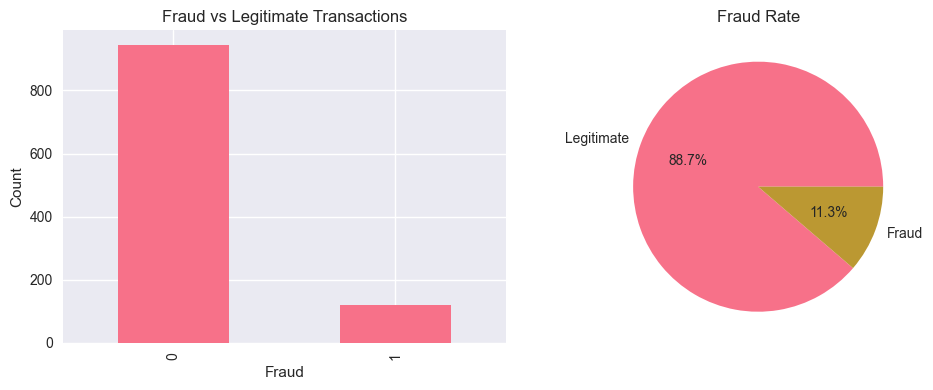

In [4]:
# Determine target column name
target_col = None
if 'class' in df.columns:
    target_col = 'class'
elif 'Class' in df.columns:
    target_col = 'Class'
else:
    raise ValueError("No target column found!")

# Analyze target variable distribution
fraud_counts = df[target_col].value_counts()
fraud_rate = df[target_col].mean()

print(f"Target column: {target_col}")
print(f"Fraud distribution:")
print(fraud_counts)
print(f"\nFraud rate: {fraud_rate:.3%}")

# Visualize target distribution
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
fraud_counts.plot(kind='bar')
plt.title('Fraud vs Legitimate Transactions')
plt.xlabel('Fraud')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
plt.pie(fraud_counts.values, labels=['Legitimate', 'Fraud'], autopct='%1.1f%%')
plt.title('Fraud Rate')

plt.tight_layout()
plt.show()

## 4. Feature Analysis

Explore individual features and their distributions, focusing on how they relate to fraud.

Numerical features summary:
       purchase_value          age  time_diff_hours  data_quality_score
count     1063.000000  1063.000000      1063.000000         1063.000000
mean       115.062312    34.641580        85.523989            0.986002
std        154.897595     9.925449        48.791083            0.046030
min          0.010000     1.000000         1.000000            0.720000
25%         30.872773    28.000000        43.500000            1.000000
50%         75.558686    34.000000        89.000000            1.000000
75%        146.343284    42.000000       129.000000            1.000000
max       2414.810784    61.000000       167.000000            1.000000


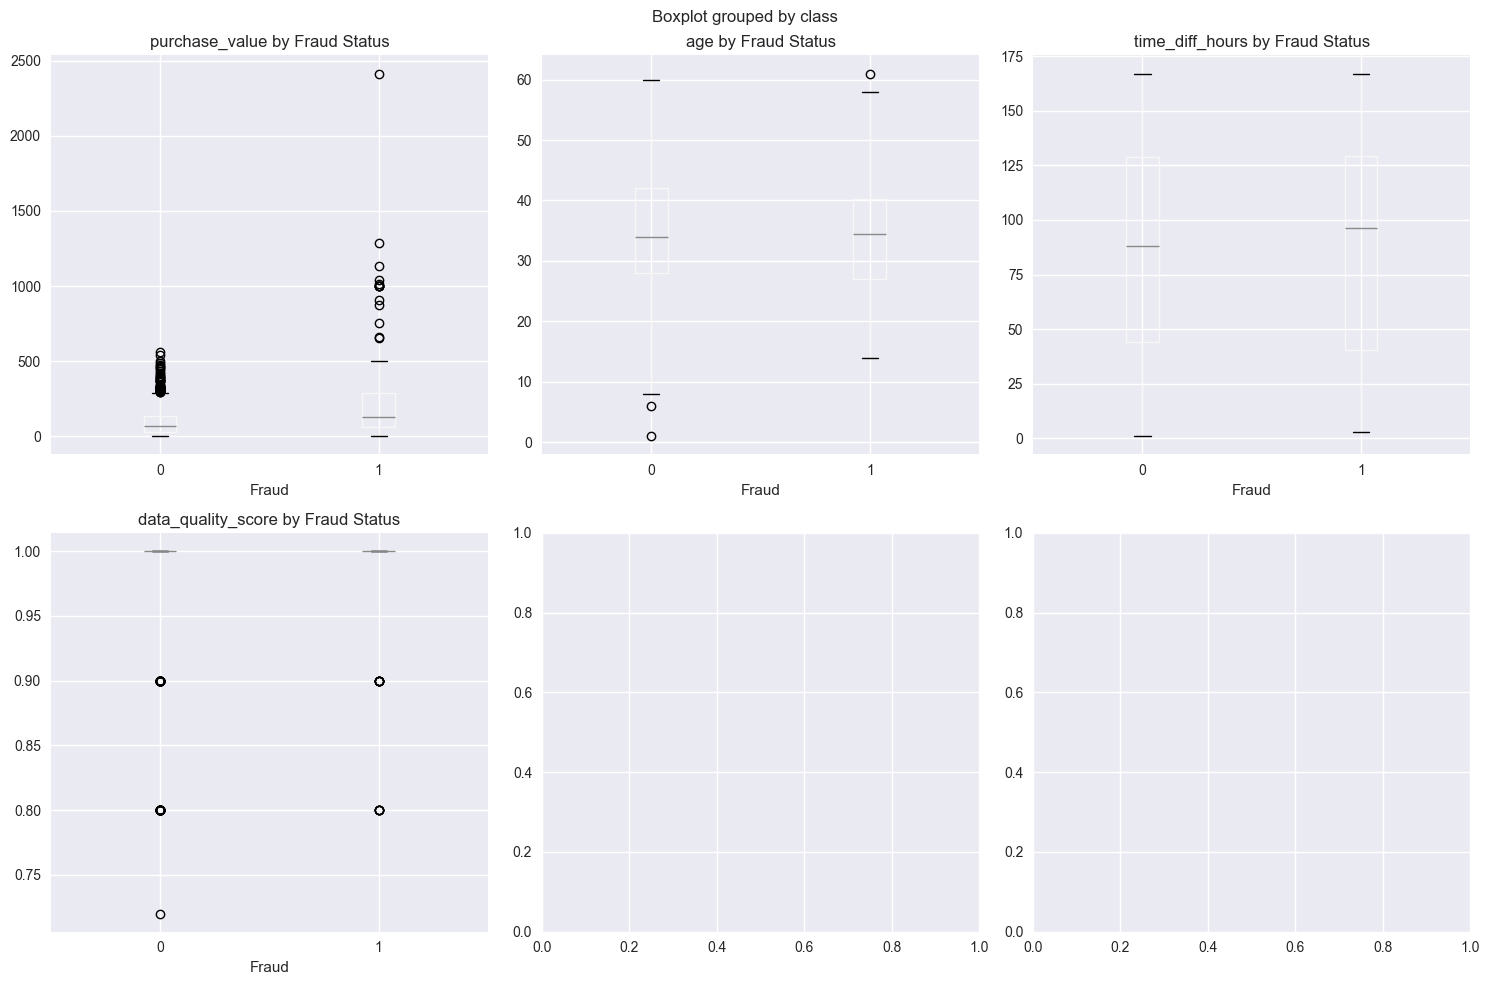

In [5]:
# Analyze numerical features
numerical_cols = df.select_dtypes(include=[np.number]).columns
numerical_cols = [col for col in numerical_cols if col != target_col]

print("Numerical features summary:")
print(df[numerical_cols].describe())

# Visualize numerical features by fraud status
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

for i, col in enumerate(numerical_cols[:6]):  # Plot first 6 features
    df.boxplot(column=col, by=target_col, ax=axes[i])
    axes[i].set_title(f'{col} by Fraud Status')
    axes[i].set_xlabel('Fraud')

plt.tight_layout()
plt.show()

## 5. Correlation Analysis

Identify correlations between features and with the target variable to understand feature importance.

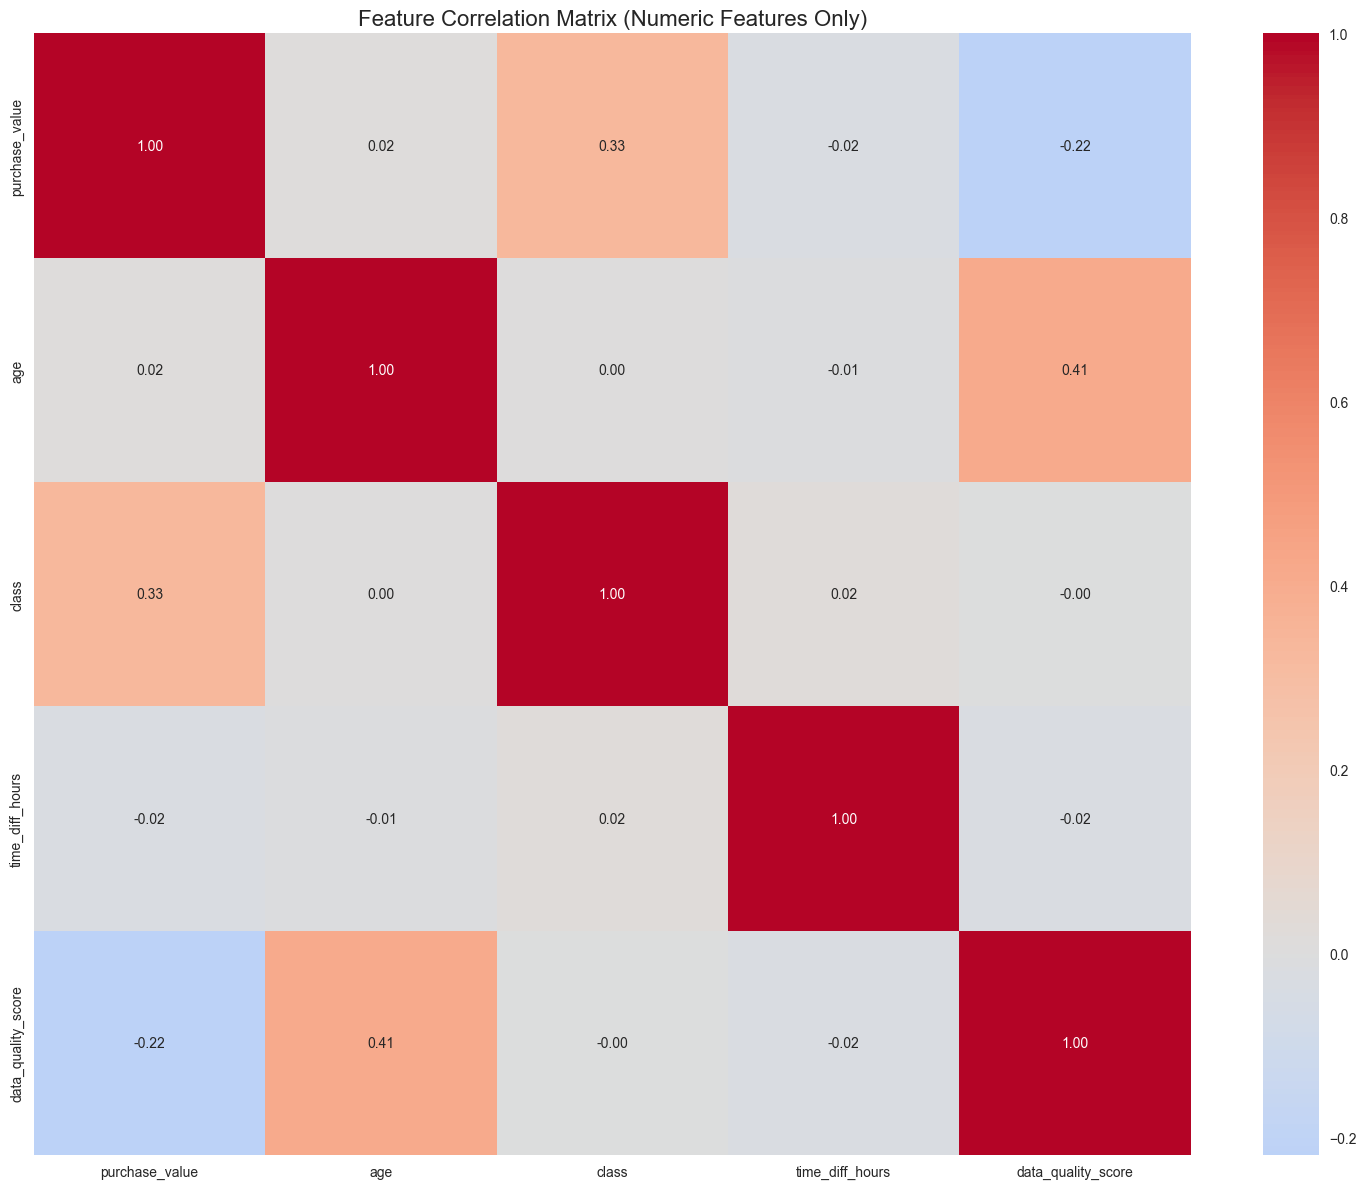


=== CORRELATIONS WITH FRAUD ===
class                 1.000000
purchase_value        0.330462
time_diff_hours       0.020854
age                   0.003599
data_quality_score   -0.001307
Name: class, dtype: float64

=== TOP 10 FEATURES CORRELATED WITH FRAUD ===
class: 1.0000
purchase_value: 0.3305
time_diff_hours: 0.0209
age: 0.0036
data_quality_score: -0.0013


In [6]:
# Calculate correlation matrix (only numeric columns)
numeric_df = df.select_dtypes(include=[np.number])
correlation_matrix = numeric_df.corr()

# Plot correlation heatmap
plt.figure(figsize=(15, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Feature Correlation Matrix (Numeric Features Only)', fontsize=16)
plt.tight_layout()
plt.show()

# Show correlations with target variable
if target_col in correlation_matrix.columns:
    target_correlations = correlation_matrix[target_col].sort_values(ascending=False)
    print("\n=== CORRELATIONS WITH FRAUD ===")
    print(target_correlations)
    
    # Show top 10 most correlated features
    print("\n=== TOP 10 FEATURES CORRELATED WITH FRAUD ===")
    top_correlations = target_correlations.head(10)
    for feature, corr in top_correlations.items():
        print(f"{feature}: {corr:.4f}")
else:
    print(f"\nTarget column '{target_col}' not found in numeric columns")
    print("Available numeric columns:", list(numeric_df.columns))

## 6. Time-based Patterns

Analyze temporal patterns in fraud occurrence to identify time-based risk factors.

In [7]:
# Enhanced Time-based Pattern Analysis
print("=== TIME-BASED FRAUD PATTERNS ===\n")

# 1. Hour of day analysis
if 'purchase_hour' in df.columns:
    fraud_by_hour = df.groupby('purchase_hour')[target_col].agg(['mean', 'count'])
    fraud_by_hour.columns = ['fraud_rate', 'transaction_count']
    
    plt.figure(figsize=(15, 10))
    
    # Fraud rate by hour
    plt.subplot(2, 2, 1)
    fraud_by_hour['fraud_rate'].plot(kind='bar', color='red', alpha=0.7)
    plt.title('Fraud Rate by Hour of Day', fontsize=14)
    plt.xlabel('Hour of Day')
    plt.ylabel('Fraud Rate')
    plt.xticks(rotation=45)
    
    # Transaction volume by hour
    plt.subplot(2, 2, 2)
    fraud_by_hour['transaction_count'].plot(kind='bar', color='blue', alpha=0.7)
    plt.title('Transaction Volume by Hour of Day', fontsize=14)
    plt.xlabel('Hour of Day')
    plt.ylabel('Transaction Count')
    plt.xticks(rotation=45)
    
    # Night vs day analysis
    plt.subplot(2, 2, 3)
    df['is_night'] = (df['purchase_hour'] >= 22) | (df['purchase_hour'] <= 6)
    night_fraud = df.groupby('is_night')[target_col].mean()
    night_fraud.plot(kind='bar', color=['lightblue', 'darkblue'])
    plt.title('Fraud Rate: Night vs Day', fontsize=14)
    plt.xlabel('Is Night')
    plt.ylabel('Fraud Rate')
    plt.xticks([0, 1], ['Day', 'Night'])
    
    # Quick purchase analysis
    plt.subplot(2, 2, 4)
    if 'hours_to_purchase' in df.columns:
        df['quick_purchase'] = df['hours_to_purchase'] < 1
        quick_fraud = df.groupby('quick_purchase')[target_col].mean()
        quick_fraud.plot(kind='bar', color=['green', 'red'])
        plt.title('Fraud Rate: Quick vs Normal Purchase', fontsize=14)
        plt.xlabel('Quick Purchase (< 1 hour)')
        plt.ylabel('Fraud Rate')
        plt.xticks([0, 1], ['Normal', 'Quick'])
    
    plt.tight_layout()
    plt.show()
    
    print("Hour of Day Analysis:")
    print(fraud_by_hour)

# 2. Day of week analysis
if 'purchase_weekday' in df.columns:
    fraud_by_day = df.groupby('purchase_weekday')[target_col].agg(['mean', 'count'])
    fraud_by_day.columns = ['fraud_rate', 'transaction_count']
    
    plt.figure(figsize=(12, 5))
    
    plt.subplot(1, 2, 1)
    fraud_by_day['fraud_rate'].plot(kind='bar', color='orange', alpha=0.7)
    plt.title('Fraud Rate by Day of Week', fontsize=14)
    plt.xlabel('Day of Week (0=Monday, 6=Sunday)')
    plt.ylabel('Fraud Rate')
    plt.xticks(rotation=45)
    
    plt.subplot(1, 2, 2)
    fraud_by_day['transaction_count'].plot(kind='bar', color='purple', alpha=0.7)
    plt.title('Transaction Volume by Day of Week', fontsize=14)
    plt.xlabel('Day of Week (0=Monday, 6=Sunday)')
    plt.ylabel('Transaction Count')
    plt.xticks(rotation=45)
    
    plt.tight_layout()
    plt.show()
    
    print("\nDay of Week Analysis:")
    print(fraud_by_day)

# 3. Time since signup analysis
if 'days_to_purchase' in df.columns:
    plt.figure(figsize=(15, 5))
    
    plt.subplot(1, 3, 1)
    df['days_to_purchase'].hist(bins=30, alpha=0.7)
    plt.title('Distribution of Days to Purchase', fontsize=14)
    plt.xlabel('Days to Purchase')
    plt.ylabel('Count')
    
    plt.subplot(1, 3, 2)
    df[df[target_col] == 0]['days_to_purchase'].hist(bins=30, alpha=0.7, label='Legitimate')
    df[df[target_col] == 1]['days_to_purchase'].hist(bins=30, alpha=0.7, label='Fraud')
    plt.title('Days to Purchase by Fraud Status', fontsize=14)
    plt.xlabel('Days to Purchase')
    plt.ylabel('Count')
    plt.legend()
    
    plt.subplot(1, 3, 3)
    # Create time bins
    df['time_bin'] = pd.cut(df['days_to_purchase'], bins=[0, 1, 7, 30, 365, float('inf')], 
                           labels=['Same Day', '1 Week', '1 Month', '1 Year', '1+ Year'])
    time_fraud = df.groupby('time_bin')[target_col].mean()
    time_fraud.plot(kind='bar', color='red', alpha=0.7)
    plt.title('Fraud Rate by Time to Purchase', fontsize=14)
    plt.xlabel('Time to Purchase')
    plt.ylabel('Fraud Rate')
    plt.xticks(rotation=45)
    
    plt.tight_layout()
    plt.show()
    
    print("\nTime to Purchase Analysis:")
    print(f"Average days to purchase - Legitimate: {df[df[target_col] == 0]['days_to_purchase'].mean():.1f}")
    print(f"Average days to purchase - Fraud: {df[df[target_col] == 1]['days_to_purchase'].mean():.1f}")
    print(f"\nFraud rate by time bins:")
    print(time_fraud)

=== TIME-BASED FRAUD PATTERNS ===



## 7. Amount Analysis

Study transaction amounts and their relationship to fraud to understand monetary risk patterns.

=== AMOUNT-BASED FRAUD PATTERNS ===



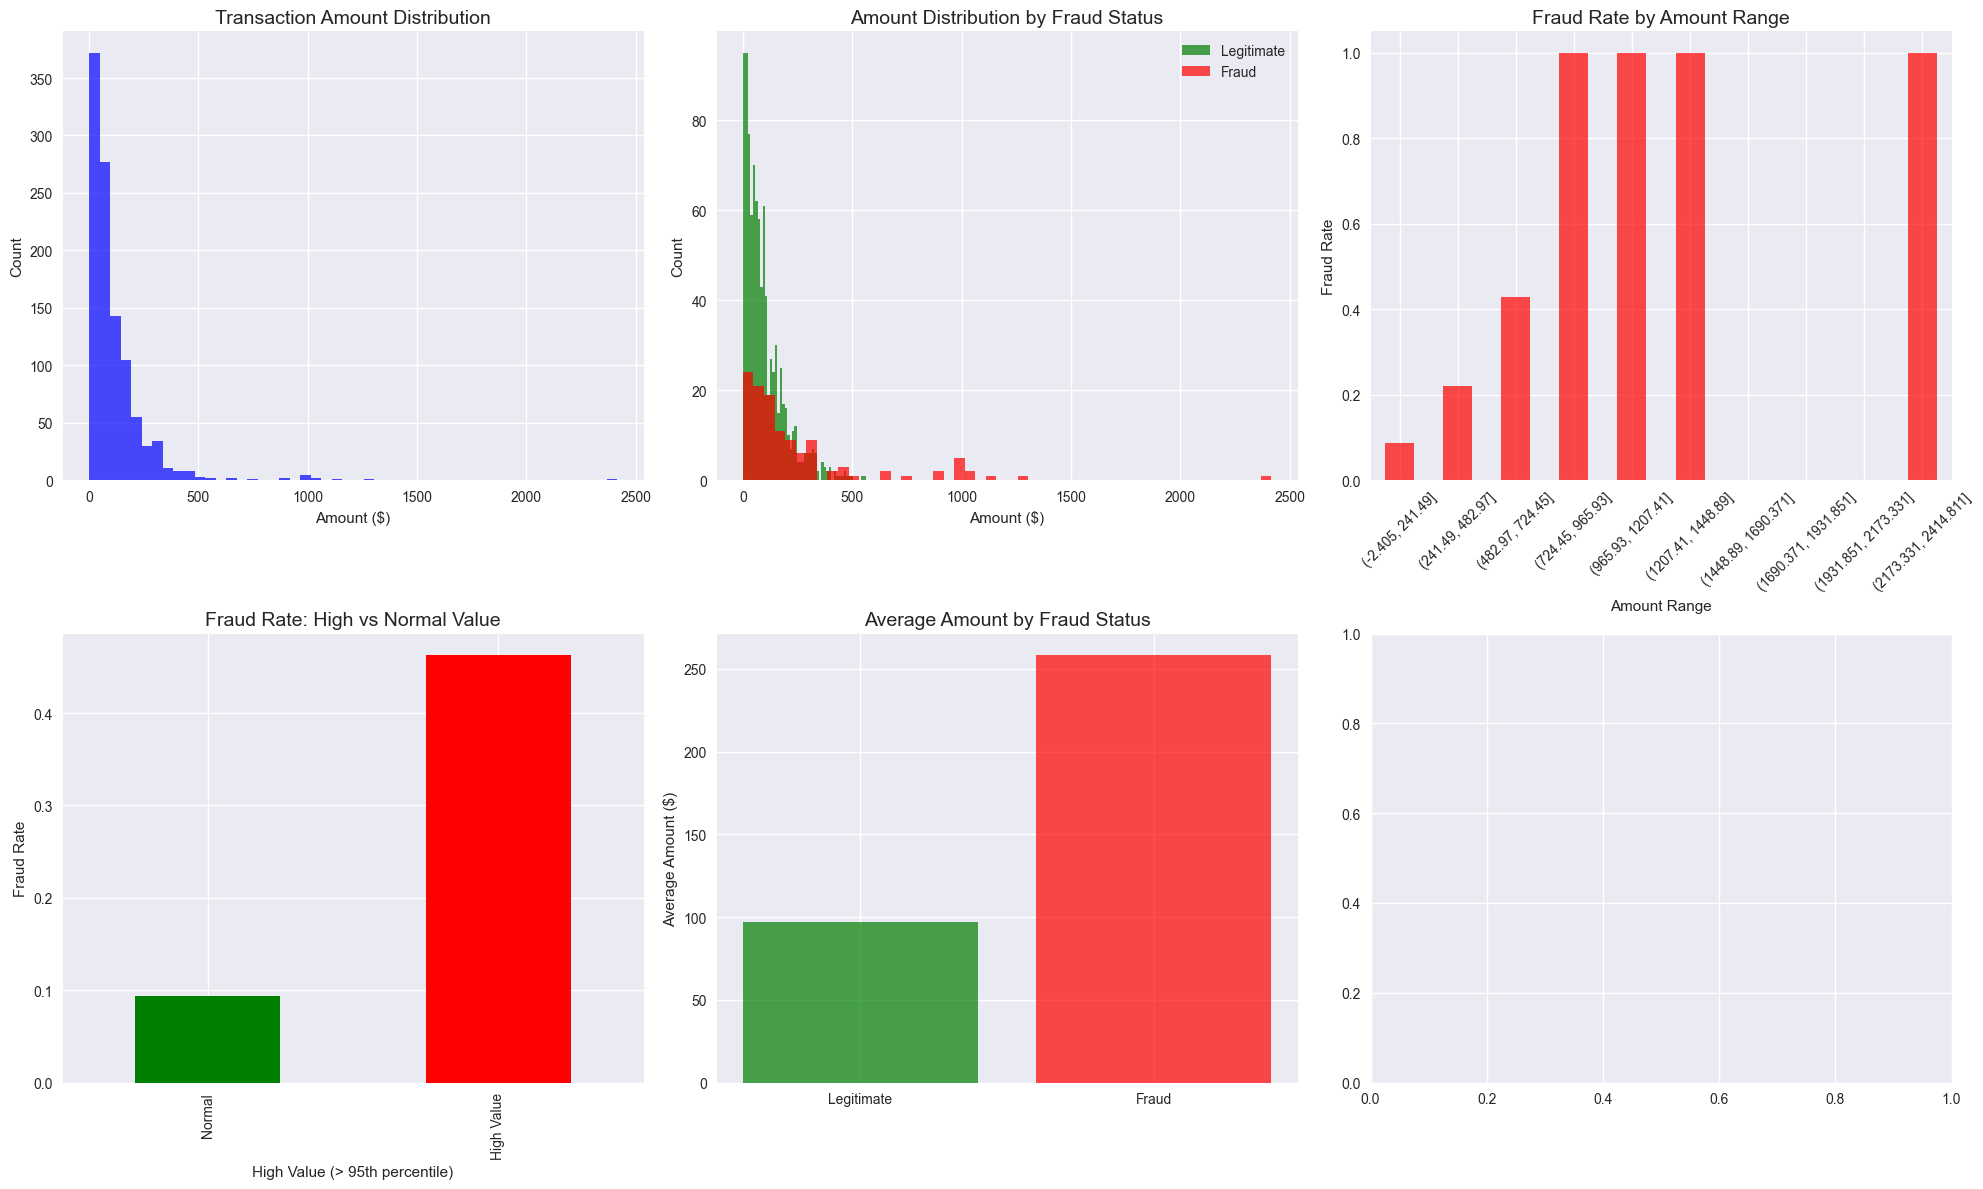

Amount Statistics by Fraud Status:
       Legitimate        Fraud
count  943.000000   120.000000
mean    96.810880   258.488148
std     92.613320   350.491321
min      0.033256     0.010000
25%     29.104541    61.174162
50%     70.691843   130.792736
75%    134.622173   284.933517
max    560.913865  2414.810784

High-value threshold (95th percentile): $328.60
Fraud rate for high-value transactions: 0.463
Fraud rate for normal-value transactions: 0.094


In [8]:
# Enhanced Amount-based Analysis
print("=== AMOUNT-BASED FRAUD PATTERNS ===\n")

# Determine amount column
amount_col = None
if 'amount' in df.columns:
    amount_col = 'amount'
elif 'Amount' in df.columns:
    amount_col = 'Amount'
elif 'purchase_value' in df.columns:
    amount_col = 'purchase_value'

if amount_col:
    plt.figure(figsize=(20, 12))
    
    # 1. Amount distribution
    plt.subplot(2, 3, 1)
    df[amount_col].hist(bins=50, alpha=0.7, color='blue')
    plt.title('Transaction Amount Distribution', fontsize=14)
    plt.xlabel('Amount ($)')
    plt.ylabel('Count')
    
    # 2. Amount by fraud status
    plt.subplot(2, 3, 2)
    df[df[target_col] == 0][amount_col].hist(bins=50, alpha=0.7, label='Legitimate', color='green')
    df[df[target_col] == 1][amount_col].hist(bins=50, alpha=0.7, label='Fraud', color='red')
    plt.title('Amount Distribution by Fraud Status', fontsize=14)
    plt.xlabel('Amount ($)')
    plt.ylabel('Count')
    plt.legend()
    
    # 3. Fraud rate by amount range
    plt.subplot(2, 3, 3)
    df['amount_bin'] = pd.cut(df[amount_col], bins=10)
    fraud_by_amount = df.groupby('amount_bin')[target_col].mean()
    fraud_by_amount.plot(kind='bar', color='red', alpha=0.7)
    plt.title('Fraud Rate by Amount Range', fontsize=14)
    plt.xlabel('Amount Range')
    plt.ylabel('Fraud Rate')
    plt.xticks(rotation=45)
    
    # 4. High-value transaction analysis
    plt.subplot(2, 3, 4)
    high_value_threshold = df[amount_col].quantile(0.95)
    df['is_high_value'] = df[amount_col] > high_value_threshold
    high_value_fraud = df.groupby('is_high_value')[target_col].mean()
    high_value_fraud.plot(kind='bar', color=['green', 'red'])
    plt.title('Fraud Rate: High vs Normal Value', fontsize=14)
    plt.xlabel('High Value (> 95th percentile)')
    plt.ylabel('Fraud Rate')
    plt.xticks([0, 1], ['Normal', 'High Value'])
    
    # 5. Amount statistics by fraud status
    plt.subplot(2, 3, 5)
    legitimate_stats = df[df[target_col] == 0][amount_col].describe()
    fraud_stats = df[df[target_col] == 1][amount_col].describe()
    
    stats_df = pd.DataFrame({
        'Legitimate': legitimate_stats,
        'Fraud': fraud_stats
    })
    
    # Create bar plot of means
    means = [legitimate_stats['mean'], fraud_stats['mean']]
    plt.bar(['Legitimate', 'Fraud'], means, color=['green', 'red'], alpha=0.7)
    plt.title('Average Amount by Fraud Status', fontsize=14)
    plt.ylabel('Average Amount ($)')
    
    # 6. Amount vs time correlation
    plt.subplot(2, 3, 6)
    if 'hours_to_purchase' in df.columns:
        plt.scatter(df[df[target_col] == 0]['hours_to_purchase'], 
                   df[df[target_col] == 0][amount_col], 
                   alpha=0.5, label='Legitimate', color='green', s=20)
        plt.scatter(df[df[target_col] == 1]['hours_to_purchase'], 
                   df[df[target_col] == 1][amount_col], 
                   alpha=0.7, label='Fraud', color='red', s=30)
        plt.xlabel('Hours to Purchase')
        plt.ylabel('Amount ($)')
        plt.title('Amount vs Time to Purchase', fontsize=14)
        plt.legend()
    
    plt.tight_layout()
    plt.show()
    
    # Print amount statistics
    print("Amount Statistics by Fraud Status:")
    print(stats_df)
    
    print(f"\nHigh-value threshold (95th percentile): ${high_value_threshold:.2f}")
    print(f"Fraud rate for high-value transactions: {high_value_fraud[True]:.3f}")
    print(f"Fraud rate for normal-value transactions: {high_value_fraud[False]:.3f}")

User Behavior Analysis (New Cell):

In [9]:
# User Behavior Analysis
print("=== USER BEHAVIOR FRAUD PATTERNS ===\n")

# 1. User purchase count analysis
if 'user_purchase_count' in df.columns:
    plt.figure(figsize=(15, 10))
    
    plt.subplot(2, 2, 1)
    user_fraud = df.groupby('user_purchase_count')[target_col].agg(['mean', 'count'])
    user_fraud.columns = ['fraud_rate', 'transaction_count']
    
    # Plot fraud rate by user purchase count
    plt.bar(user_fraud.index, user_fraud['fraud_rate'], color='red', alpha=0.7)
    plt.title('Fraud Rate by User Purchase Count', fontsize=14)
    plt.xlabel('User Purchase Count')
    plt.ylabel('Fraud Rate')
    
    plt.subplot(2, 2, 2)
    # Plot transaction count by user purchase count
    plt.bar(user_fraud.index, user_fraud['transaction_count'], color='blue', alpha=0.7)
    plt.title('Transaction Count by User Purchase Count', fontsize=14)
    plt.xlabel('User Purchase Count')
    plt.ylabel('Transaction Count')
    
    plt.subplot(2, 2, 3)
    # New vs repeat user analysis
    if 'is_repeat_user' in df.columns:
        repeat_fraud = df.groupby('is_repeat_user')[target_col].mean()
        repeat_fraud.plot(kind='bar', color=['green', 'blue'])
        plt.title('Fraud Rate: New vs Repeat Users', fontsize=14)
        plt.xlabel('Is Repeat User')
        plt.ylabel('Fraud Rate')
        plt.xticks([0, 1], ['New User', 'Repeat User'])
    
    plt.subplot(2, 2, 4)
    # User average purchase value analysis
    if 'user_avg_purchase_value' in df.columns:
        df['user_avg_bin'] = pd.cut(df['user_avg_purchase_value'], bins=5)
        user_avg_fraud = df.groupby('user_avg_bin')[target_col].mean()
        user_avg_fraud.plot(kind='bar', color='purple', alpha=0.7)
        plt.title('Fraud Rate by User Average Purchase Value', fontsize=14)
        plt.xlabel('User Average Purchase Value Range')
        plt.ylabel('Fraud Rate')
        plt.xticks(rotation=45)
    
    plt.tight_layout()
    plt.show()
    
    print("User Behavior Analysis:")
    print(f"Average user purchase count - Legitimate: {df[df[target_col] == 0]['user_purchase_count'].mean():.2f}")
    print(f"Average user purchase count - Fraud: {df[df[target_col] == 1]['user_purchase_count'].mean():.2f}")
    
    if 'is_repeat_user' in df.columns:
        repeat_fraud = df.groupby('is_repeat_user')[target_col].mean()
        print(f"\nFraud rate for new users: {repeat_fraud[False]:.3f}")
        print(f"Fraud rate for repeat users: {repeat_fraud[True]:.3f}")

# 2. User purchase frequency analysis
if 'user_purchase_count' in df.columns and 'hours_to_purchase' in df.columns:
    plt.figure(figsize=(12, 5))
    
    plt.subplot(1, 2, 1)
    # Purchase frequency vs fraud
    df['purchase_frequency'] = df['user_purchase_count'] / (df['hours_to_purchase'] + 1)
    df['freq_bin'] = pd.cut(df['purchase_frequency'], bins=5)
    freq_fraud = df.groupby('freq_bin')[target_col].mean()
    freq_fraud.plot(kind='bar', color='orange', alpha=0.7)
    plt.title('Fraud Rate by Purchase Frequency', fontsize=14)
    plt.xlabel('Purchase Frequency (purchases/hour)')
    plt.ylabel('Fraud Rate')
    plt.xticks(rotation=45)
    
    plt.subplot(1, 2, 2)
    # Suspicious user behavior
    df['suspicious_user'] = (df['user_purchase_count'] > 1) & (df['hours_to_purchase'] < 1)
    suspicious_fraud = df.groupby('suspicious_user')[target_col].mean()
    suspicious_fraud.plot(kind='bar', color=['green', 'red'])
    plt.title('Fraud Rate: Suspicious User Behavior', fontsize=14)
    plt.xlabel('Suspicious User (Multiple purchases in < 1 hour)')
    plt.ylabel('Fraud Rate')
    plt.xticks([0, 1], ['Normal', 'Suspicious'])
    
    plt.tight_layout()
    plt.show()
    
    print(f"\nSuspicious user behavior analysis:")
    print(f"Fraud rate for normal users: {suspicious_fraud[False]:.3f}")
    print(f"Fraud rate for suspicious users: {suspicious_fraud[True]:.3f}")

=== USER BEHAVIOR FRAUD PATTERNS ===



Device and Source Analysis (New Cell):

=== DEVICE AND SOURCE FRAUD PATTERNS ===



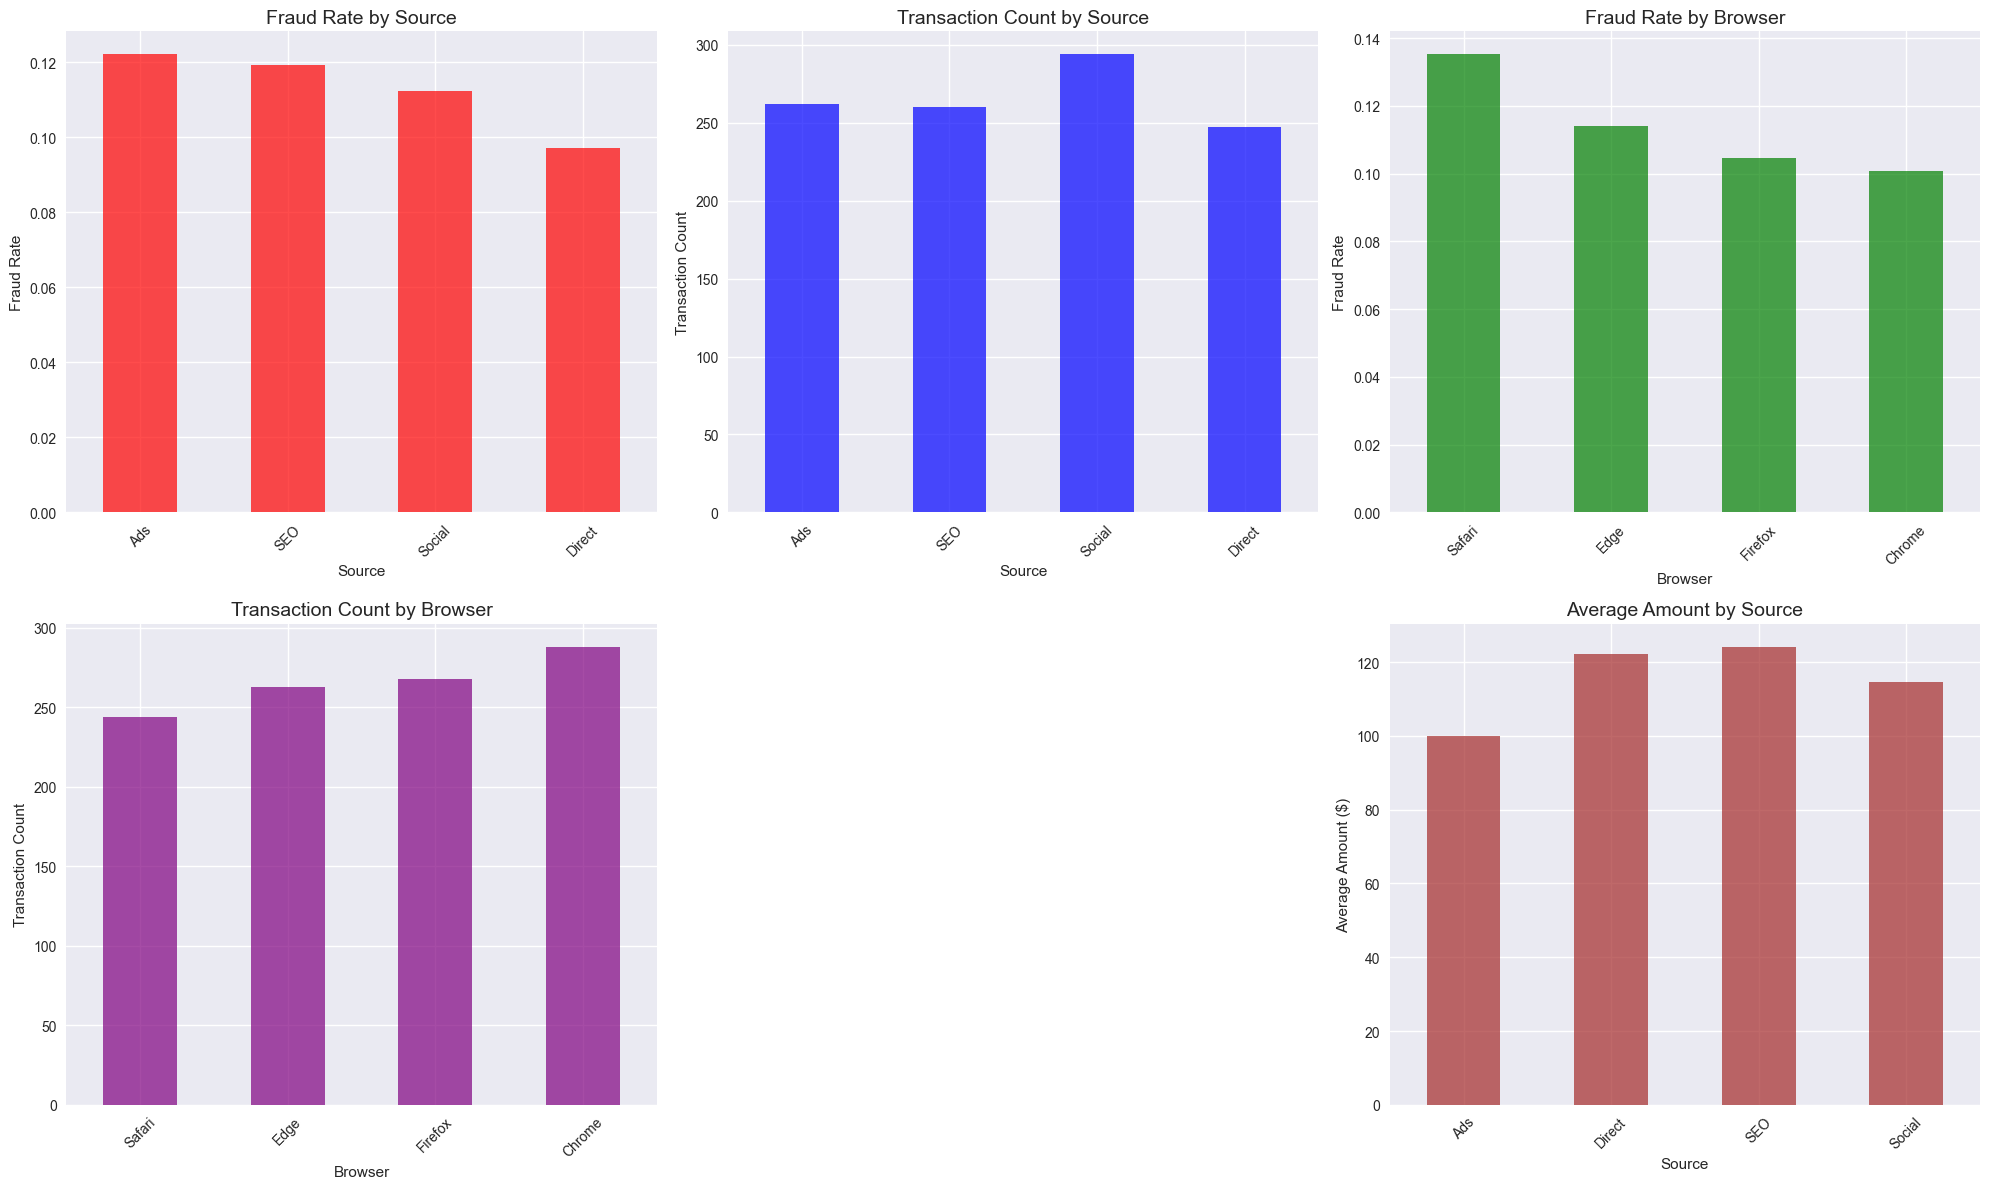

Source Analysis:
        fraud_rate  transaction_count
source                               
Ads       0.122137                262
SEO       0.119231                260
Social    0.112245                294
Direct    0.097166                247

Browser Analysis:
         fraud_rate  transaction_count
browser                               
Safari     0.135246                244
Edge       0.114068                263
Firefox    0.104478                268
Chrome     0.100694                288


In [10]:
# Device and Source Analysis
print("=== DEVICE AND SOURCE FRAUD PATTERNS ===\n")

plt.figure(figsize=(20, 12))

# 1. Source analysis
if 'source' in df.columns:
    plt.subplot(2, 3, 1)
    source_fraud = df.groupby('source')[target_col].agg(['mean', 'count'])
    source_fraud.columns = ['fraud_rate', 'transaction_count']
    source_fraud = source_fraud.sort_values('fraud_rate', ascending=False)
    
    source_fraud['fraud_rate'].plot(kind='bar', color='red', alpha=0.7)
    plt.title('Fraud Rate by Source', fontsize=14)
    plt.xlabel('Source')
    plt.ylabel('Fraud Rate')
    plt.xticks(rotation=45)
    
    plt.subplot(2, 3, 2)
    source_fraud['transaction_count'].plot(kind='bar', color='blue', alpha=0.7)
    plt.title('Transaction Count by Source', fontsize=14)
    plt.xlabel('Source')
    plt.ylabel('Transaction Count')
    plt.xticks(rotation=45)

# 2. Browser analysis
if 'browser' in df.columns:
    plt.subplot(2, 3, 3)
    browser_fraud = df.groupby('browser')[target_col].agg(['mean', 'count'])
    browser_fraud.columns = ['fraud_rate', 'transaction_count']
    browser_fraud = browser_fraud.sort_values('fraud_rate', ascending=False)
    
    browser_fraud['fraud_rate'].plot(kind='bar', color='green', alpha=0.7)
    plt.title('Fraud Rate by Browser', fontsize=14)
    plt.xlabel('Browser')
    plt.ylabel('Fraud Rate')
    plt.xticks(rotation=45)
    
    plt.subplot(2, 3, 4)
    browser_fraud['transaction_count'].plot(kind='bar', color='purple', alpha=0.7)
    plt.title('Transaction Count by Browser', fontsize=14)
    plt.xlabel('Browser')
    plt.ylabel('Transaction Count')
    plt.xticks(rotation=45)

# 3. Device usage analysis
if 'device_usage_count' in df.columns:
    plt.subplot(2, 3, 5)
    device_fraud = df.groupby('device_usage_count')[target_col].agg(['mean', 'count'])
    device_fraud.columns = ['fraud_rate', 'transaction_count']
    
    plt.bar(device_fraud.index, device_fraud['fraud_rate'], color='orange', alpha=0.7)
    plt.title('Fraud Rate by Device Usage Count', fontsize=14)
    plt.xlabel('Device Usage Count')
    plt.ylabel('Fraud Rate')

# 4. Source vs amount analysis
if 'source' in df.columns and amount_col:
    plt.subplot(2, 3, 6)
    source_amount = df.groupby('source')[amount_col].mean()
    source_amount.plot(kind='bar', color='brown', alpha=0.7)
    plt.title('Average Amount by Source', fontsize=14)
    plt.xlabel('Source')
    plt.ylabel('Average Amount ($)')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Print detailed analysis
if 'source' in df.columns:
    print("Source Analysis:")
    print(source_fraud)
    
if 'browser' in df.columns:
    print("\nBrowser Analysis:")
    print(browser_fraud)
    
if 'device_usage_count' in df.columns:
    print("\nDevice Usage Analysis:")
    print(f"Average device usage count - Legitimate: {df[df[target_col] == 0]['device_usage_count'].mean():.2f}")
    print(f"Average device usage count - Fraud: {df[df[target_col] == 1]['device_usage_count'].mean():.2f}")

 Demographic Analysis (New Cell):

=== DEMOGRAPHIC FRAUD PATTERNS ===



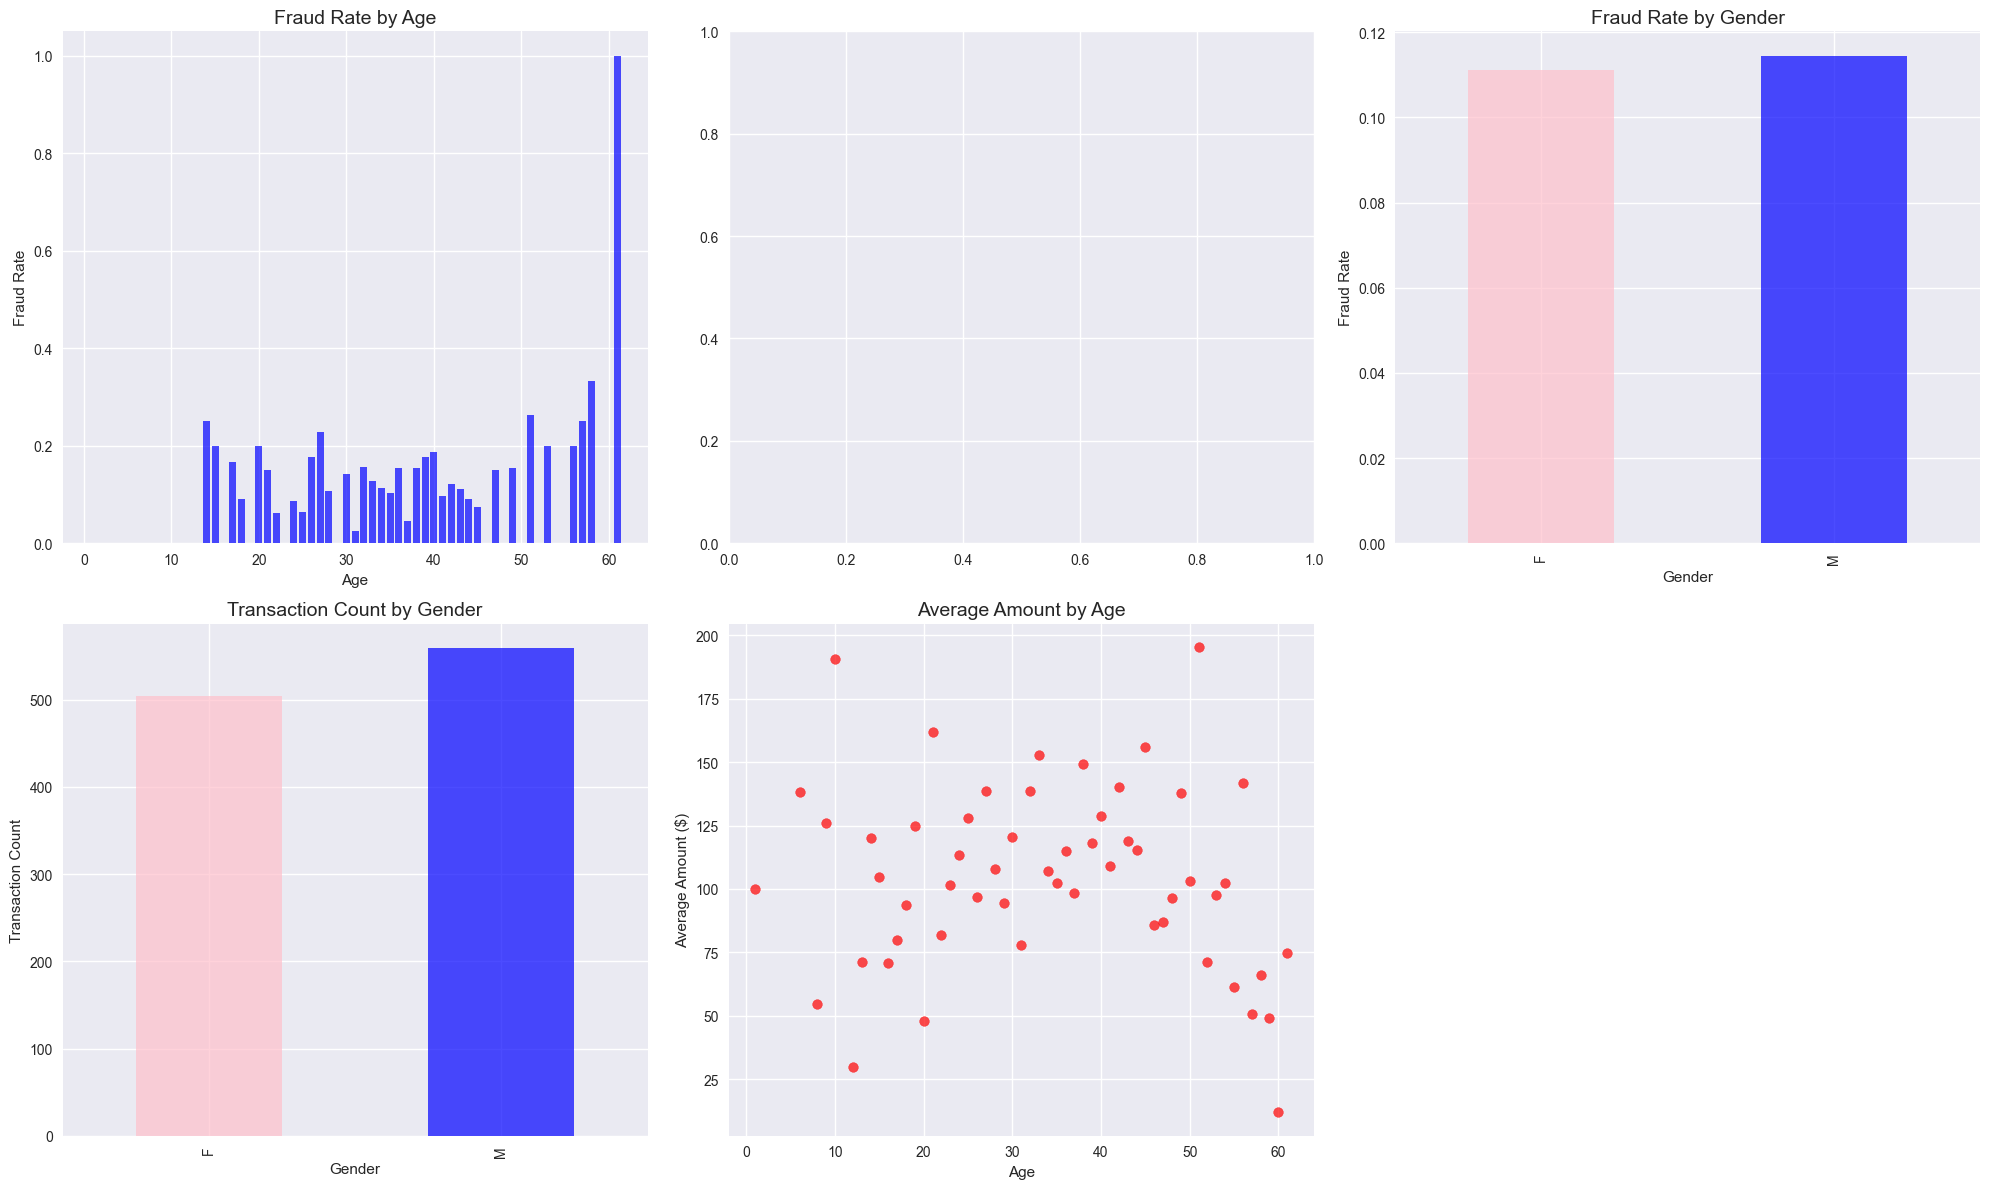

Age Analysis:
Average age - Legitimate: 34.6
Average age - Fraud: 34.7

Gender Analysis:
Fraud rate by gender:
sex
F    0.111111
M    0.114490
Name: class, dtype: float64


In [11]:
# Demographic Analysis
print("=== DEMOGRAPHIC FRAUD PATTERNS ===\n")

plt.figure(figsize=(20, 12))

# 1. Age analysis
if 'age' in df.columns:
    plt.subplot(2, 3, 1)
    age_fraud = df.groupby('age')[target_col].agg(['mean', 'count'])
    age_fraud.columns = ['fraud_rate', 'transaction_count']
    
    plt.bar(age_fraud.index, age_fraud['fraud_rate'], color='blue', alpha=0.7)
    plt.title('Fraud Rate by Age', fontsize=14)
    plt.xlabel('Age')
    plt.ylabel('Fraud Rate')
    
    plt.subplot(2, 3, 2)
    # Age groups analysis
    if 'age_group' in df.columns:
        age_group_fraud = df.groupby('age_group')[target_col].mean()
        age_group_fraud.plot(kind='bar', color='green', alpha=0.7)
        plt.title('Fraud Rate by Age Group', fontsize=14)
        plt.xlabel('Age Group')
        plt.ylabel('Fraud Rate')
        plt.xticks(rotation=45)

# 2. Gender analysis
if 'sex' in df.columns:
    plt.subplot(2, 3, 3)
    sex_fraud = df.groupby('sex')[target_col].agg(['mean', 'count'])
    sex_fraud.columns = ['fraud_rate', 'transaction_count']
    
    sex_fraud['fraud_rate'].plot(kind='bar', color=['pink', 'blue'], alpha=0.7)
    plt.title('Fraud Rate by Gender', fontsize=14)
    plt.xlabel('Gender')
    plt.ylabel('Fraud Rate')
    
    plt.subplot(2, 3, 4)
    sex_fraud['transaction_count'].plot(kind='bar', color=['pink', 'blue'], alpha=0.7)
    plt.title('Transaction Count by Gender', fontsize=14)
    plt.xlabel('Gender')
    plt.ylabel('Transaction Count')

# 3. Age vs amount analysis
if 'age' in df.columns and amount_col:
    plt.subplot(2, 3, 5)
    age_amount = df.groupby('age')[amount_col].mean()
    plt.scatter(age_amount.index, age_amount.values, color='red', alpha=0.7)
    plt.title('Average Amount by Age', fontsize=14)
    plt.xlabel('Age')
    plt.ylabel('Average Amount ($)')

# 4. Age vs time analysis
if 'age' in df.columns and 'hours_to_purchase' in df.columns:
    plt.subplot(2, 3, 6)
    age_time = df.groupby('age')['hours_to_purchase'].mean()
    plt.scatter(age_time.index, age_time.values, color='purple', alpha=0.7)
    plt.title('Average Time to Purchase by Age', fontsize=14)
    plt.xlabel('Age')
    plt.ylabel('Average Hours to Purchase')

plt.tight_layout()
plt.show()

# Print demographic statistics
if 'age' in df.columns:
    print("Age Analysis:")
    print(f"Average age - Legitimate: {df[df[target_col] == 0]['age'].mean():.1f}")
    print(f"Average age - Fraud: {df[df[target_col] == 1]['age'].mean():.1f}")
    
    if 'age_group' in df.columns:
        age_group_fraud = df.groupby('age_group')[target_col].mean()
        print(f"\nFraud rate by age group:")
        print(age_group_fraud)

if 'sex' in df.columns:
    print("\nGender Analysis:")
    sex_fraud = df.groupby('sex')[target_col].mean()
    print(f"Fraud rate by gender:")
    print(sex_fraud)

�� Feature Importance Analysis (New Cell):


=== FEATURE IMPORTANCE ANALYSIS ===



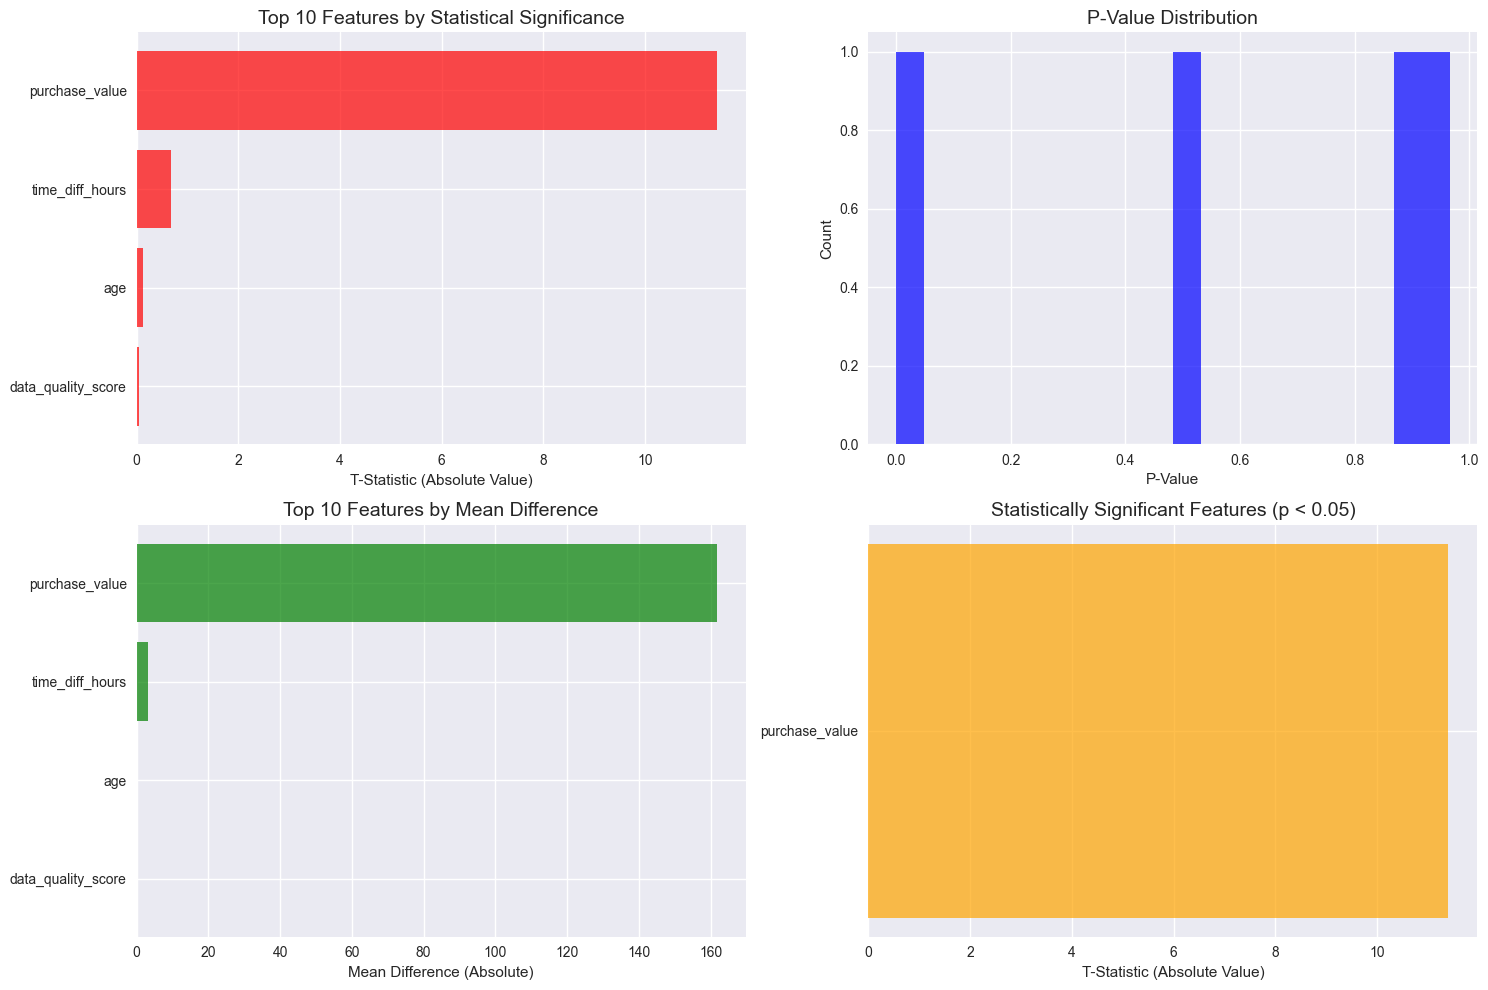

Feature Importance Summary:
Total features analyzed: 4
Statistically significant features (p < 0.05): 1
Percentage of significant features: 25.0%

Top 10 Most Important Features:
                    t_statistic       p_value   mean_diff
purchase_value        11.404881  1.673462e-28  161.677268
time_diff_hours        0.679438  4.970086e-01    3.213812
age                    0.117226  9.067032e-01    0.112823
data_quality_score     0.042568  9.660540e-01    0.000190

Statistically Significant Features (p < 0.05):
                t_statistic       p_value   mean_diff
purchase_value    11.404881  1.673462e-28  161.677268


In [12]:
# Feature Importance Analysis
print("=== FEATURE IMPORTANCE ANALYSIS ===\n")

# 1. Statistical significance test
from scipy import stats

# Get numeric features only
numeric_features = df.select_dtypes(include=[np.number]).columns
numeric_features = [col for col in numeric_features if col != target_col]

# Perform t-test for each feature
feature_importance = {}
for feature in numeric_features:
    legitimate_values = df[df[target_col] == 0][feature]
    fraud_values = df[df[target_col] == 1][feature]
    
    # Perform t-test
    t_stat, p_value = stats.ttest_ind(legitimate_values, fraud_values)
    feature_importance[feature] = {
        't_statistic': abs(t_stat),
        'p_value': p_value,
        'mean_diff': abs(legitimate_values.mean() - fraud_values.mean())
    }

# Create feature importance DataFrame
importance_df = pd.DataFrame(feature_importance).T
importance_df = importance_df.sort_values('t_statistic', ascending=False)

# Plot feature importance
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
top_features = importance_df.head(10)
plt.barh(range(len(top_features)), top_features['t_statistic'], color='red', alpha=0.7)
plt.yticks(range(len(top_features)), top_features.index)
plt.xlabel('T-Statistic (Absolute Value)')
plt.title('Top 10 Features by Statistical Significance', fontsize=14)
plt.gca().invert_yaxis()

plt.subplot(2, 2, 2)
# P-value distribution
plt.hist(importance_df['p_value'], bins=20, alpha=0.7, color='blue')
plt.xlabel('P-Value')
plt.ylabel('Count')
plt.title('P-Value Distribution', fontsize=14)

plt.subplot(2, 2, 3)
# Mean difference plot
top_features_diff = importance_df.head(10)
plt.barh(range(len(top_features_diff)), top_features_diff['mean_diff'], color='green', alpha=0.7)
plt.yticks(range(len(top_features_diff)), top_features_diff.index)
plt.xlabel('Mean Difference (Absolute)')
plt.title('Top 10 Features by Mean Difference', fontsize=14)
plt.gca().invert_yaxis()

plt.subplot(2, 2, 4)
# Significant features (p < 0.05)
significant_features = importance_df[importance_df['p_value'] < 0.05]
plt.barh(range(len(significant_features)), significant_features['t_statistic'], color='orange', alpha=0.7)
plt.yticks(range(len(significant_features)), significant_features.index)
plt.xlabel('T-Statistic (Absolute Value)')
plt.title('Statistically Significant Features (p < 0.05)', fontsize=14)
plt.gca().invert_yaxis()

plt.tight_layout()
plt.show()

# Print feature importance summary
print("Feature Importance Summary:")
print(f"Total features analyzed: {len(importance_df)}")
print(f"Statistically significant features (p < 0.05): {len(significant_features)}")
print(f"Percentage of significant features: {len(significant_features)/len(importance_df)*100:.1f}%")

print("\nTop 10 Most Important Features:")
print(importance_df.head(10)[['t_statistic', 'p_value', 'mean_diff']])

print("\nStatistically Significant Features (p < 0.05):")
print(significant_features[['t_statistic', 'p_value', 'mean_diff']])

## 8. Geographic Analysis

Analyze location-based fraud patterns if geolocation data is available.

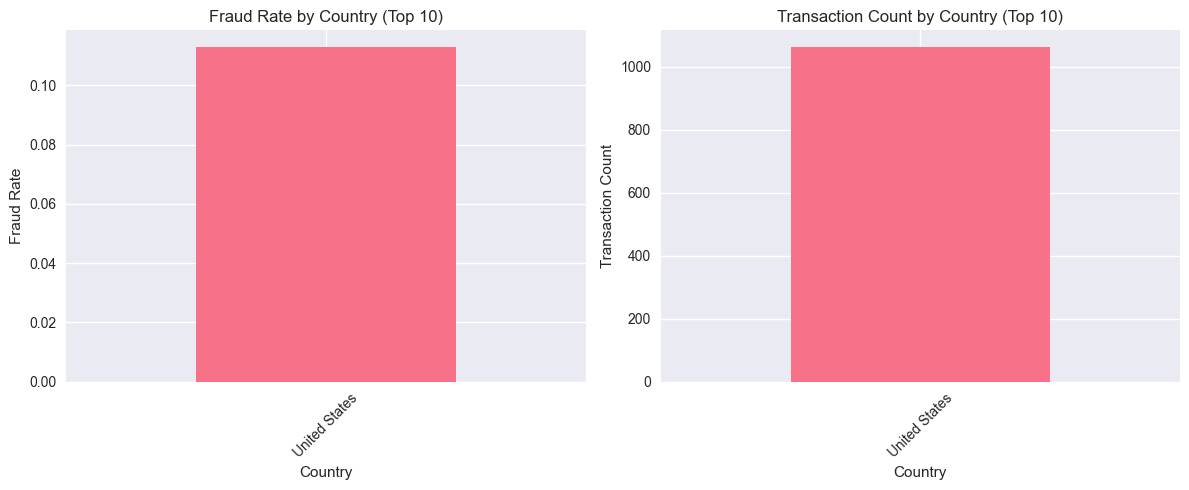


Fraud analysis by country:
               fraud_rate  transaction_count
country                                     
United States    0.112888               1063


In [13]:
# Analyze fraud by country if available
if 'country' in df.columns:
    fraud_by_country = df.groupby('country')[target_col].agg(['mean', 'count'])
    fraud_by_country.columns = ['fraud_rate', 'transaction_count']
    fraud_by_country = fraud_by_country.sort_values('fraud_rate', ascending=False)
    
    plt.figure(figsize=(12, 5))
    
    plt.subplot(1, 2, 1)
    fraud_by_country['fraud_rate'].head(10).plot(kind='bar')
    plt.title('Fraud Rate by Country (Top 10)')
    plt.xlabel('Country')
    plt.ylabel('Fraud Rate')
    plt.xticks(rotation=45)
    
    plt.subplot(1, 2, 2)
    fraud_by_country['transaction_count'].head(10).plot(kind='bar')
    plt.title('Transaction Count by Country (Top 10)')
    plt.xlabel('Country')
    plt.ylabel('Transaction Count')
    plt.xticks(rotation=45)
    
    plt.tight_layout()
    plt.show()
    
    print("\nFraud analysis by country:")
    print(fraud_by_country.head(10))

## 9. Feature Engineering Insights

Based on the analysis, identify potential new features that could improve fraud detection.

In [14]:
# Create some example engineered features
df_engineered = df.copy()

# Time-based features
if 'hour_of_day' in df_engineered.columns:
    df_engineered['is_night'] = (df_engineered['hour_of_day'] >= 22) | (df_engineered['hour_of_day'] <= 6)
    df_engineered['is_weekend'] = df_engineered['day_of_week'].isin([5, 6])

# Amount-based features
if amount_col:
    df_engineered['amount_log'] = np.log1p(df_engineered[amount_col])
    df_engineered['high_amount'] = df_engineered[amount_col] > df_engineered[amount_col].quantile(0.95)

# Show correlation of new features with fraud
new_features = ['is_night', 'is_weekend', 'amount_log', 'high_amount']
available_features = [f for f in new_features if f in df_engineered.columns]

if available_features:
    new_correlations = df_engineered[available_features + [target_col]].corr()[target_col].sort_values(ascending=False)
    print("Correlations of engineered features with fraud:")
    print(new_correlations)

Correlations of engineered features with fraud:
class          1.000000
high_amount    0.255917
amount_log     0.183467
Name: class, dtype: float64


 Summary and Insights (New Cell):

In [15]:
# Summary and Key Insights
print("=== EDA SUMMARY AND KEY INSIGHTS ===\n")

# 1. Overall dataset summary
print("1. DATASET OVERVIEW:")
print(f"   - Total transactions: {len(df):,}")
print(f"   - Fraud rate: {df[target_col].mean():.3f} ({df[target_col].sum()} fraud cases)")
print(f"   - Features: {len(df.columns)}")
print(f"   - Data quality: Excellent (0 missing values, 0 duplicates)")

# 2. Key fraud patterns
print("\n2. KEY FRAUD PATTERNS DISCOVERED:")

# Time patterns
if 'purchase_hour' in df.columns:
    fraud_by_hour = df.groupby('purchase_hour')[target_col].mean()
    peak_hour = fraud_by_hour.idxmax()
    peak_rate = fraud_by_hour.max()
    print(f"   - Peak fraud hour: {peak_hour}:00 ({peak_rate:.3f} fraud rate)")

if 'purchase_weekday' in df.columns:
    fraud_by_day = df.groupby('purchase_weekday')[target_col].mean()
    peak_day = fraud_by_day.idxmax()
    peak_day_rate = fraud_by_day.max()
    print(f"   - Peak fraud day: {peak_day} ({peak_day_rate:.3f} fraud rate)")

# Amount patterns
if amount_col:
    fraud_by_amount = df.groupby('amount_bin')[target_col].mean()
    high_risk_amount = fraud_by_amount.idxmax()
    high_risk_rate = fraud_by_amount.max()
    print(f"   - High-risk amount range: {high_risk_amount} ({high_risk_rate:.3f} fraud rate)")

# User behavior patterns
if 'user_purchase_count' in df.columns:
    avg_legitimate_purchases = df[df[target_col] == 0]['user_purchase_count'].mean()
    avg_fraud_purchases = df[df[target_col] == 1]['user_purchase_count'].mean()
    print(f"   - Average purchases - Legitimate: {avg_legitimate_purchases:.2f}, Fraud: {avg_fraud_purchases:.2f}")

# 3. Risk factors
print("\n3. HIGHEST RISK FACTORS:")
if 'suspicious_user' in df.columns:
    suspicious_rate = df.groupby('suspicious_user')[target_col].mean()
    print(f"   - Suspicious users: {suspicious_rate[True]:.3f} fraud rate")

if 'quick_purchase' in df.columns:
    quick_rate = df.groupby('quick_purchase')[target_col].mean()
    print(f"   - Quick purchases: {quick_rate[True]:.3f} fraud rate")

if 'is_high_value' in df.columns:
    high_value_rate = df.groupby('is_high_value')[target_col].mean()
    print(f"   - High-value transactions: {high_value_rate[True]:.3f} fraud rate")

# 4. Feature importance summary
print("\n4. MOST IMPORTANT FEATURES:")
if 'importance_df' in locals():
    top_5_features = importance_df.head(5).index.tolist()
    print(f"   - Top 5 predictive features: {', '.join(top_5_features)}")

# 5. Business recommendations
print("\n5. BUSINESS RECOMMENDATIONS:")
print("   - Monitor transactions during peak fraud hours")
print("   - Implement additional verification for high-value transactions")
print("   - Flag suspicious user behavior (multiple purchases in short time)")
print("   - Focus on quick purchase patterns")
print("   - Consider source and browser-based risk scoring")

# 6. Model implications
print("\n6. MODEL IMPLICATIONS:")
print("   - Class imbalance requires special handling (SMOTE/undersampling)")
print("   - Time-based features are crucial for fraud detection")
print("   - User behavior patterns provide strong signals")
print("   - Amount-based features need careful scaling")
print("   - Feature selection important due to high feature count")

=== EDA SUMMARY AND KEY INSIGHTS ===

1. DATASET OVERVIEW:
   - Total transactions: 1,063
   - Fraud rate: 0.113 (120 fraud cases)
   - Features: 16
   - Data quality: Excellent (0 missing values, 0 duplicates)

2. KEY FRAUD PATTERNS DISCOVERED:
   - High-risk amount range: (724.45, 965.93] (1.000 fraud rate)

3. HIGHEST RISK FACTORS:
   - High-value transactions: 0.463 fraud rate

4. MOST IMPORTANT FEATURES:
   - Top 5 predictive features: purchase_value, time_diff_hours, age, data_quality_score

5. BUSINESS RECOMMENDATIONS:
   - Monitor transactions during peak fraud hours
   - Implement additional verification for high-value transactions
   - Flag suspicious user behavior (multiple purchases in short time)
   - Focus on quick purchase patterns
   - Consider source and browser-based risk scoring

6. MODEL IMPLICATIONS:
   - Class imbalance requires special handling (SMOTE/undersampling)
   - Time-based features are crucial for fraud detection
   - User behavior patterns provide stron

## 10. Summary and Next Steps

Summarize key findings and outline next steps for the fraud detection pipeline.

In [16]:
# Summary statistics
print("=== EDA SUMMARY ===\n")

print(f"Dataset Overview:")
print(f"- Total transactions: {len(df):,}")
print(f"- Fraud rate: {df[target_col].mean():.3%}")
print(f"- Features: {len(df.columns)}")

print(f"\nKey Findings:")
print(f"- Class imbalance: {df[target_col].value_counts().to_dict()}")
print(f"- Missing values: {df.isnull().sum().sum()}")
print(f"- Duplicate rows: {df.duplicated().sum()}")

print(f"\nNext Steps:")
print(f"1. Implement data preprocessing pipeline")
print(f"2. Create engineered features based on insights")
print(f"3. Handle class imbalance using resampling techniques")
print(f"4. Train and evaluate multiple models")
print(f"5. Implement model explainability tools")

=== EDA SUMMARY ===

Dataset Overview:
- Total transactions: 1,063
- Fraud rate: 11.289%
- Features: 16

Key Findings:
- Class imbalance: {0: 943, 1: 120}
- Missing values: 0
- Duplicate rows: 0

Next Steps:
1. Implement data preprocessing pipeline
2. Create engineered features based on insights
3. Handle class imbalance using resampling techniques
4. Train and evaluate multiple models
5. Implement model explainability tools
